In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

In [2]:
tn = pd.read_csv('../data/tn.csv')
tn.head()

C:\Users\jenwh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (192,193) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ABUS1,ABUS2,ABUS3,ACCAP,ACCCAT,ACCGDLN,ACCOFFLV,ACCTRESP,ADJ_C1,...,ADJ_E2,ADJ_E3,TOTPRISN_YRS,AGE_RANGE,PLEA_TRIAL,TOTPRISN2,CRIMECODE,CRIMETYPE,VIOLENCE,YR_RANGE
0,0,0.0,NaN,NaN,0.0,NaN,1.0,NaN,-3.0,0.0,...,NaN,NaN,1.750000,36-40,Plea,1.750000,21,drugs,Drug-Related,0-2
1,1,0.0,NaN,NaN,0.0,NaN,1.0,NaN,-3.0,0.0,...,NaN,NaN,16.666667,46-50,Plea,16.666667,21,drugs,Drug-Related,15-20
2,2,0.0,NaN,NaN,0.0,NaN,2.0,NaN,-3.0,0.0,...,NaN,NaN,2.500000,46-50,Plea,2.500000,21,drugs,Drug-Related,3-5
3,3,0.0,NaN,NaN,0.0,NaN,1.0,NaN,-3.0,0.0,...,NaN,NaN,2.500000,31-35,Plea,2.500000,18,firearms,Other Nonviolent,3-5
4,4,0.0,NaN,NaN,0.0,NaN,1.0,NaN,-2.0,0.0,...,NaN,NaN,0.000000,46-50,Plea,0.000000,18,embezzlement_theft,Other Nonviolent,zero


In [3]:
tn.value_counts('CRIMETYPE')

CRIMETYPE
drugs                    3177
firearms                 1531
other                     824
immigration               446
fraud                     277
racketeering              238
conspiracy                196
child abuse               179
embezzlement_theft        145
robbery                   112
sex offender registry      77
human trafficking          23
murder                     22
sexual                     11
dtype: int64

In [4]:
drugs = tn.loc[tn['CRIMETYPE'] == 'drugs']
drugs = drugs[['USSCIDN', 'NEWRACE', 
               'CHEMTYP1',
'COMBDRG2',
'CUNIT1',
'DAFROM1',
'DAFROM2',
'DATO1',
'DATO2',
'DRGAM1',
'DRGAM2',
'DRUGTYP1',
'DRUGTYP2',
'DRUGTYP3',
'DTGDL',
'DUFROM1',
'DUFROM2',
'DUTO1',
'DUTO2',
'ISMETHMIN',
'MWEIGHT',
'MWGT1',
'MWGT2',
'NOCHEM',
'NODRUG',
'UNIT1',
'UNIT2',
'UNIT3',
'UNIT4']]
drugs.isnull().sum()

USSCIDN         0
NEWRACE         0
CHEMTYP1     3164
COMBDRG2       13
CUNIT1       3164
DAFROM1      1957
DAFROM2      3146
DATO1        2019
DATO2        3155
DRGAM1       1427
DRGAM2       2646
DRUGTYP1       13
DRUGTYP2     2548
DRUGTYP3     2914
DTGDL          21
DUFROM1      1763
DUFROM2      3079
DUTO1        1772
DUTO2        3083
ISMETHMIN       0
MWEIGHT      1477
MWGT1        1477
MWGT2        2675
NOCHEM       3164
NODRUG         13
UNIT1          13
UNIT2        2548
UNIT3        2914
UNIT4        3060
dtype: int64

In [5]:
drugs.value_counts('NODRUG')

NODRUG
1.0     2535
2.0      366
3.0      146
4.0       70
5.0       23
6.0       12
7.0        5
8.0        4
16.0       1
10.0       1
9.0        1
dtype: int64

In [6]:
tn.value_counts('NODRUG')

NODRUG
1.0     2617
2.0      410
3.0      167
4.0       74
5.0       28
6.0       16
7.0        6
8.0        5
16.0       1
10.0       1
9.0        1
dtype: int64

In [7]:
hispanic = tn.loc[tn['NEWRACE'] == 'Hispanic']
hispanic.value_counts('CRIMETYPE')

CRIMETYPE
immigration              434
drugs                    286
other                     72
conspiracy                42
firearms                  39
racketeering               8
fraud                      8
sex offender registry      4
embezzlement_theft         4
child abuse                4
human trafficking          2
dtype: int64

In [8]:
nvh = hispanic.loc[hispanic['VIOLENCE'] == 'Other Nonviolent']
nvh.value_counts('CRIMETYPE')

CRIMETYPE
immigration              388
other                     61
conspiracy                38
firearms                  36
fraud                      6
sex offender registry      4
racketeering               4
embezzlement_theft         4
human trafficking          2
dtype: int64

In [9]:
drh = hispanic.loc[hispanic['VIOLENCE'] == 'Drug-Related']
drh.value_counts('CRIMETYPE')

CRIMETYPE
drugs           244
racketeering      2
immigration       2
firearms          2
other             1
dtype: int64

In [10]:
vh = hispanic.loc[hispanic['VIOLENCE'] == 'Violent']
vh.value_counts('CRIMETYPE')

CRIMETYPE
immigration     44
drugs           42
other           10
conspiracy       4
child abuse      3
racketeering     2
fraud            2
firearms         1
dtype: int64

In [11]:
hispanic.value_counts('VIOLENCE')

VIOLENCE
Other Nonviolent    543
Drug-Related        251
Violent             108
Sexual                1
dtype: int64

### So pie chart of immigration cases:
- 434 total
- 388 non-violent
- 2 drug-related
- 44 violent

### So of the 543 nonviolent hispanic cases:
- 388 (71%) were immigration only
- Others were scattered and random

In [12]:
immigration = hispanic.loc[hispanic['CRIMETYPE'] == 'immigration']
nvimmigration = immigration.loc[immigration['VIOLENCE'] == 'Other Nonviolent']
nvimmigration.value_counts('YR_RANGE')

YR_RANGE
zero    229
0-2     123
3-5      33
5-10      3
dtype: int64

In [13]:
list(tn.columns)

['Unnamed: 0',
 'ABUS1',
 'ABUS2',
 'ABUS3',
 'ACCAP',
 'ACCCAT',
 'ACCGDLN',
 'ACCOFFLV',
 'ACCTRESP',
 'ADJ_C1',
 'ADJ_G1',
 'ADJ_H1',
 'ADJ_I1',
 'ADJ_J1',
 'ADJ_K1',
 'ADJ_L1',
 'ADJ_M1',
 'ADJ_N1',
 'ADJ_O1',
 'ADJ_P1',
 'ADJOFL1',
 'AGE',
 'AGGROL1',
 'AGGROL2',
 'ALTMO',
 'AMTFINEC',
 'AMTREST',
 'AMTTOTAL',
 'ARMCRIM',
 'CAROFFAP',
 'CAROFFEN',
 'CAROFFLV',
 'CASETYPE',
 'CHAP2',
 'CHEMTYP1',
 'CHP2CHG1',
 'CHP2CHG2',
 'CHP2TXT1',
 'CHP3CHG1',
 'CHP3CHG2',
 'CHP4CHG1',
 'CHP4CHG2',
 'CIRCDIST',
 'CITIZEN',
 'CITWHERE',
 'CO924TAB',
 'COADJLEV',
 'COMBDRG2',
 'CRIMHIST',
 'CRIMLIV',
 'CRIMPTS',
 'CRMLIVAP',
 'CUNIT1',
 'DISPOSIT',
 'DISTRICT',
 'DRUGMIN',
 'DRUGTYP1',
 'DRUGTYP2',
 'DRUGTYP3',
 'DTGDL',
 'DUFROM1',
 'DUFROM2',
 'DUTO1',
 'DUTO2',
 'EDUCATN',
 'FAILMIN',
 'FIREMIN1',
 'FIREMIN2',
 'GLMAX',
 'GLMIN',
 'GUNMIN1',
 'GUNMIN2',
 'HISPORIG',
 'HOMDUM',
 'HRCOMSRV',
 'HUMAN1',
 'INNOPL1',
 'INNOPL2',
 'INOUT',
 'INPLEA1',
 'INPLEA2',
 'INTDUM',
 'IS1028A',
 'IS924C',
 '

In [14]:
nvimmigration.value_counts('REAS1')

REAS1
2.0       30
1.0       11
500.0     11
48.0       8
3.0        6
1205.0     4
747.0      4
17.0       3
60.0       3
16.0       3
1200.0     2
777.0      2
4.0        2
649.0      2
11.0       2
19.0       2
1208.0     1
47.0       1
1206.0     1
652.0      1
761.0      1
828.0      1
61.0       1
dtype: int64

In [15]:
reas2 = nvimmigration.loc[nvimmigration['REAS1'] == 2]
reas2.value_counts('YR_RANGE')

YR_RANGE
zero    14
0-2     13
3-5      3
dtype: int64

### I'm trying to figure out whether these people who committed immigration crimes and have zero time got deported.

In [16]:
zerotime = nvimmigration.loc[nvimmigration['YR_RANGE'] == 'zero']
zerotime.describe()

,Unnamed: 0,ABUS1,ABUS2,ABUS3,ACCAP,ACCCAT,ACCGDLN,ACCOFFLV,ACCTRESP,ADJ_C1,...,YEAR,ADJ_D1,ADJ_D2,ADJ_D3,ADJ_E1,ADJ_E2,ADJ_E3,TOTPRISN_YRS,TOTPRISN2,CRIMECODE
count,229.000000,170.0,0.0,0.0,229.0,0.0,229.000000,139.0,170.000000,153.000000,...,229.000000,153.0,0.0,0.0,4.0,0.0,0.0,229.0,229.0,229.0
mean,5213.510917,0.0,NaN,NaN,0.0,NaN,2.820961,0.0,-2.052941,0.509804,...,2018.244541,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,81.0
std,1456.809761,0.0,NaN,NaN,0.0,NaN,3.060544,0.0,0.224578,1.784869,...,1.076678,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0
min,203.000000,0.0,NaN,NaN,0.0,NaN,1.000000,0.0,-3.000000,0.000000,...,2015.000000,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,81.0
25%,4666.000000,0.0,NaN,NaN,0.0,NaN,1.000000,0.0,-2.000000,0.000000,...,2018.000000,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,81.0
50%,5662.000000,0.0,NaN,NaN,0.0,NaN,1.000000,0.0,-2.000000,0.000000,...,2019.000000,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,81.0
75%,6146.000000,0.0,NaN,NaN,0.0,NaN,8.000000,0.0,-2.000000,0.000000,...,2019.000000,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,81.0
max,7256.000000,0.0,NaN,NaN,0.0,NaN,8.000000,0.0,-2.000000,10.000000,...,2019.000000,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,81.0


In [17]:
zerotime.value_counts('ACCTRESP')

ACCTRESP
-2.0    161
-3.0      9
dtype: int64

### So 170 out of 229 of those who served zero time accepted responsibility.

In [18]:
nvimmigration.value_counts('IMMIMIN')

IMMIMIN
0    388
dtype: int64

In [19]:
immigration.value_counts('IMMIMIN')

IMMIMIN
0    434
dtype: int64

In [20]:
ztdf = zerotime.describe()
z = ztdf.transpose()
for row_index, row_value in z.iterrows():
    print(row_index)
    print(row_value['mean'])


Unnamed: 0
5213.510917030568
ABUS1
0.0
ABUS2
nan
ABUS3
nan
ACCAP
0.0
ACCCAT
nan
ACCGDLN
2.8209606986899565
ACCOFFLV
0.0
ACCTRESP
-2.052941176470588
ADJ_C1
0.5098039215686274
ADJ_G1
0.0
ADJ_H1
0.0
ADJ_I1
0.0
ADJ_J1
0.0
ADJ_K1
nan
ADJ_L1
nan
ADJ_M1
nan
ADJ_N1
nan
ADJ_O1
nan
ADJ_P1
nan
ADJOFL1
9.282352941176471
AGE
33.64192139737991
AGGROL1
0.0
AGGROL2
nan
ALTMO
0.021834061135371178
AMTFINEC
0.0
AMTREST
0.0
AMTTOTAL
0.0
ARMCRIM
0.0
CAROFFAP
0.0
CAROFFEN
0.0
CAROFFLV
0.0
CHAP2
9.282352941176471
CHEMTYP1
nan
CHP2CHG1
6.0
CHP2CHG2
nan
CHP3CHG1
nan
CHP3CHG2
nan
CHP4CHG1
nan
CHP4CHG2
nan
CIRCDIST
43.44541484716157
CITIZEN
2.995633187772926
CITWHERE
44.854922279792746
CO924TAB
nan
COADJLEV
9.282352941176471
COMBDRG2
nan
CRIMHIST
0.995575221238938
CRIMLIV
0.0
CRIMPTS
1.4192139737991267
CRMLIVAP
0.0
CUNIT1
nan
DISPOSIT
1.0
DISTRICT
49.44541484716157
DRUGMIN
0.0
DRUGTYP1
nan
DRUGTYP2
nan
DRUGTYP3
nan
DUFROM1
nan
DUFROM2
nan
DUTO1
nan
DUTO2
nan
EDUCATN
10.414634146341463
FAILMIN
0.0
FIREMIN1
0.0
FI

In [21]:
nvimmigration.value_counts('ALTMO')

ALTMO
0    387
5      1
dtype: int64

In [22]:
nvimmigration.value_counts('CHAP2')

CHAP2
8.0     147
12.0     72
16.0     30
24.0     29
20.0     16
18.0     12
15.0      5
10.0      5
22.0      2
14.0      2
19.0      1
17.0      1
dtype: int64

In [23]:
nvimmigration.value_counts('DISPOSIT')

DISPOSIT
1    386
4      1
3      1
dtype: int64

In [24]:
nvimmigration.value_counts('HOMDUM')
# so only 1 person received home detention.

HOMDUM
0.0    387
1.0      1
dtype: int64

In [25]:
nvimmigration.value_counts('INNOPL1')

INNOPL1
4.0    20
3.0    18
5.0    15
7.0     7
2.0     4
dtype: int64

In [26]:
nvimmigration.value_counts('MAND1')
# 4 means no count of conviction carries a minimum sentence, and 5 means mand min sentence imposed.

MAND1
4.0    364
5.0      3
dtype: int64

In [27]:
nvimmigration.value_counts('MOHOMDET')

MOHOMDET
0.0    387
5.0      1
dtype: int64

In [28]:
nvimmigration.value_counts('PRESENT')
# 1 = in custody, 2 = out on bail/bond

PRESENT
1.0    329
2.0      2
dtype: int64

In [29]:
nvimmigration.value_counts('SENSPLT0')
# This is total prison sentence in months including alternatives, including 
# home detention, community confinement, and intermittent confinement. 

SENSPLT0
0.03     51
24.00    16
5.00     15
15.00    15
12.03    14
         ..
4.96      1
7.46      1
70.00     1
5.07      1
5.06      1
Length: 154, dtype: int64

(array([79., 62., 64., 18.,  2.,  0.,  0.,  2.,  0.,  2.]),
 array([ 0.   ,  2.223,  4.446,  6.669,  8.892, 11.115, 13.338, 15.561,
        17.784, 20.007, 22.23 ]),
 <BarContainer object of 10 artists>)

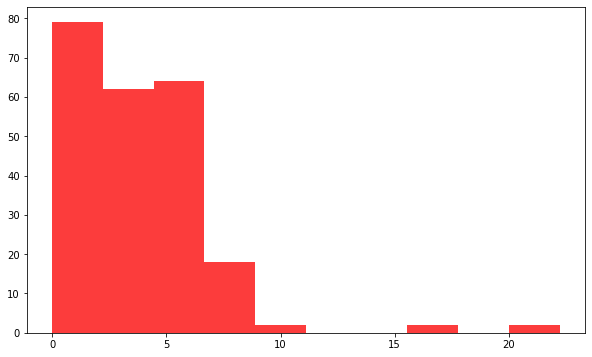

In [30]:
# timeserved = nvimmigration.value_counts('TIMSERVD').to_frame().reset_index()
# timeserved.columns = ['TIMSERVD', 'count']
plt.figure(figsize = (10, 6))
plt.hist(zerotime.SENSPLT0, color = '#FC3C3C')

In [31]:
nvimmigration.value_counts('MOCOMCON')
# so none of these people received community confinement

MOCOMCON
0.0    388
dtype: int64

In [32]:
dict(nvimmigration.value_counts('TIMSERVC'))
# this is months credited for time already served. so many of these people received credit for some time,
# but about half (161) didn't. 
# 997 means time served, amount unknown.

{0.0: 161,
 997.0: 62,
 5.0: 11,
 7.0: 5,
 3.0: 4,
 4.0: 3,
 6.0: 3,
 2.49: 3,
 3.66: 3,
 4.76: 2,
 3.69: 2,
 4.95: 2,
 2.53: 2,
 5.68: 2,
 3.81: 2,
 2.3: 2,
 2.2: 2,
 4.14: 2,
 2.14: 2,
 4.66: 2,
 2.0: 2,
 3.89: 2,
 5.49: 2,
 8.0: 2,
 3.53: 2,
 4.49: 2,
 3.26: 2,
 5.72: 2,
 3.62: 1,
 3.55: 1,
 3.52: 1,
 3.79: 1,
 3.68: 1,
 3.76: 1,
 3.42: 1,
 3.84: 1,
 3.91: 1,
 3.95: 1,
 3.98: 1,
 4.07: 1,
 4.13: 1,
 3.49: 1,
 20.39: 1,
 3.29: 1,
 2.26: 1,
 0.23: 1,
 1.56: 1,
 1.61: 1,
 1.62: 1,
 1.84: 1,
 1.87: 1,
 1.92: 1,
 1.97: 1,
 2.04: 1,
 2.16: 1,
 2.36: 1,
 3.23: 1,
 2.43: 1,
 2.5: 1,
 2.56: 1,
 2.62: 1,
 2.69: 1,
 2.82: 1,
 2.99: 1,
 4.24: 1,
 3.03: 1,
 3.06: 1,
 3.02: 1,
 4.5: 1,
 4.27: 1,
 6.77: 1,
 5.76: 1,
 5.78: 1,
 5.79: 1,
 5.89: 1,
 5.95: 1,
 6.04: 1,
 6.21: 1,
 6.31: 1,
 6.33: 1,
 6.43: 1,
 6.66: 1,
 6.79: 1,
 4.36: 1,
 7.16: 1,
 7.26: 1,
 7.46: 1,
 7.53: 1,
 7.59: 1,
 7.92: 1,
 8.07: 1,
 8.26: 1,
 8.89: 1,
 9.0: 1,
 16.0: 1,
 5.75: 1,
 5.65: 1,
 5.58: 1,
 5.53: 1,
 4.37: 1,
 4.43: 

In [33]:
timeserved = nvimmigration.value_counts('TIMSERVD').to_frame().reset_index()
timeserved.columns = ['TIMSERVD', 'count']

In [34]:
timeserved.head(30)

,TIMSERVD,count
0,0.0,194
1,997.0,62
2,15.0,7
3,8.0,6
4,16.0,4
5,29.0,4
6,27.0,4
7,7.0,4
8,20.0,4
9,19.0,4


In [35]:
nvimmigration.value_counts('TOTDAYS')

TOTDAYS
0.0      369
1.0       14
177.0      1
54.0       1
20.0       1
12.0       1
5.0        1
dtype: int64

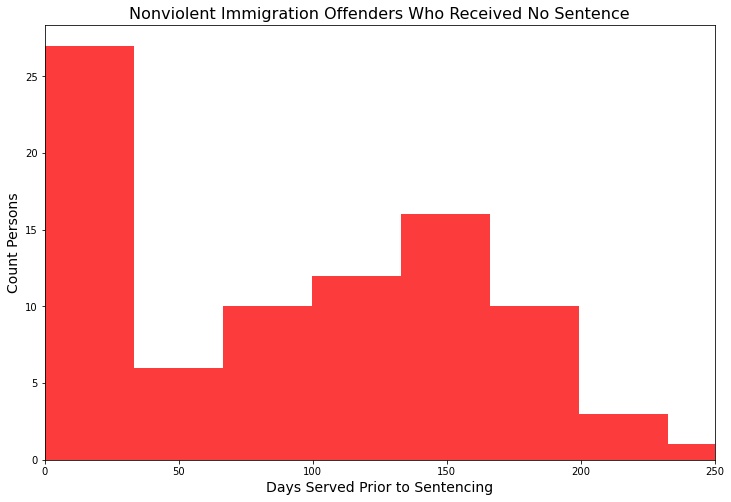

In [36]:
plt.figure(figsize = (12, 8))
plt.hist(timeserved.TIMSERVD, bins = 30, color = '#FC3C3C')
plt.xlim(0, 250)
plt.xlabel('Days Served Prior to Sentencing', fontsize = 14)
plt.ylabel('Count Persons', fontsize = 14)
plt.title('Nonviolent Immigration Offenders Who Received No Sentence', fontsize = 16)
plt.savefig('../Visualizations/Immigration Backstory.png', dpi = 300)

In [37]:
nvimmigration.value_counts('TIMSERVD')

TIMSERVD
0.0      194
997.0     62
15.0       7
8.0        6
16.0       4
        ... 
135.0      1
137.0      1
139.0      1
140.0      1
93.0       1
Length: 86, dtype: int64

In [38]:
nvimmigration.shape

(388, 209)

In [39]:
388-194

194

In [40]:
credit = nvimmigration.loc[nvimmigration['TIMSERVD'] > 0]
credit.value_counts('YR_RANGE')

YR_RANGE
zero    194
dtype: int64

In [41]:
credit = credit.loc[credit['TIMSERVC'] != 997]
credit.TIMSERVD.describe()

count    132.000000
mean      70.492424
std       65.501180
min        1.000000
25%       15.000000
50%       29.000000
75%      129.250000
max      241.000000
Name: TIMSERVD, dtype: float64

In [42]:
credit.TIMSERVC.describe()

count    132.000000
mean       4.580985
std        2.652946
min        0.230000
25%        3.187500
50%        4.315000
75%        5.490000
max       22.230000
Name: TIMSERVC, dtype: float64

In [43]:
nvimmigration.value_counts('CITIZEN')
# 1 = US Citizen
# 2 = Legal Alien
# 3 = Illegal Alien
# 4 = Not a US Citizen

CITIZEN
3.0    380
2.0      4
4.0      3
1.0      1
dtype: int64

## So, of these 388 nonviolent immigration offenders, 375 (96.6%) are not legal residents. As such, it's likely that many of them were deported.

In [44]:
tn.value_counts('SAFETY')
safe = tn.loc[tn['SAFETY'] == 1]
safe.value_counts('NEWRACE')

NEWRACE
White       327
Black       120
Hispanic     94
Other         5
dtype: int64

In [45]:
safe.TOTPRISN.describe()

count    546.000000
mean      32.765568
std       29.066832
min        0.000000
25%        6.000000
50%       30.000000
75%       48.000000
max      168.000000
Name: TOTPRISN, dtype: float64

In [46]:
unsafe = tn.loc[tn['SAFETY'] != 1]
unsafe.TOTPRISN.describe()

count    6712.000000
mean       92.832241
std       462.029134
min         0.000000
25%        15.000000
50%        51.000000
75%       108.000000
max      9996.000000
Name: TOTPRISN, dtype: float64

Don't think this is helpful, bc safety valve is supposedly only applied to low level offenses anyway.

In [47]:
safe.value_counts('VIOLENCE')

VIOLENCE
Drug-Related    546
dtype: int64

So these are all drug offenders, so we would need to subset to other drug offenses.

In [48]:
safe.value_counts('NODRUG')

NODRUG
1.0    459
2.0     52
3.0     14
4.0     13
5.0      3
6.0      2
9.0      1
8.0      1
7.0      1
dtype: int64

93% are for 2 or less drugs, so we'll subset our prior "unsafe" group to drug offenders to 2 or less.

In [49]:
unsafe = unsafe.loc[unsafe['VIOLENCE'] == 'Drug-Related']
unsafe = unsafe.loc[unsafe['NODRUG'] <= 2]
unsafe.TOTPRISN.describe()

count    2303.000000
mean      118.945289
std       508.739330
min         0.000000
25%        48.000000
50%        84.000000
75%       121.000000
max      9996.000000
Name: TOTPRISN, dtype: float64

WOW, this actually made the difference way worse.

In [50]:
2303+546

2849

In [51]:
546/2849

0.19164619164619165

Last thing, let's check average weight of drugs for safety valve cases.

In [52]:
safe.value_counts('DAFROM1')

DAFROM1
50.00          31
500.00         21
5.00           21
100.00         17
35.00          14
150.00         14
20.00          11
1.50           10
15.00           8
2.00            8
40.00           5
60.00           4
1.00            3
400.00          3
400000.00       2
28.00           2
4.50            2
350.00          2
3.00            2
1000.00         2
2.50            1
0.17            1
16.80           1
4.00            1
13432835.00     1
22.40           1
28.34           1
30.00           1
80.00           1
112.00          1
200.00          1
700.00          1
2000.00         1
5000.00         1
60000.00        1
140000.00       1
150000.00       1
0.00            1
dtype: int64

In [53]:
safe.DAFROM1.isnull().sum()

346

In [54]:
safe.value_counts('DATO1')

DATO1
150.00       26
50.00        22
500.00       17
15.00        14
400.00       13
2.00         11
4.50         10
35.00         9
3.50          8
1.50          7
60.00         5
20.00         4
80.00         4
5.00          4
100.00        3
10.00         3
40.00         3
3.00          2
1.00          2
112.00        2
200.00        2
700.00        2
3000.00       2
300000.00     1
85.05         1
28.00         1
22.40         1
196.00        1
350.00        1
4.00          1
6000.00       1
10000.00      1
16000.00      1
700000.00     1
dtype: int64

In [55]:
safe.DATO1.isnull().sum()

360

In [56]:
safe.value_counts('DRGAM1')

DRGAM1
2.00      5
500.00    4
988.00    4
3.00      4
0.68      3
         ..
183.90    1
180.00    1
176.03    1
175.60    1
98.20     1
Length: 248, dtype: int64

In [57]:
safe.DRGAM1.isnull().sum()

244

In [58]:
safe.value_counts('MWEIGHT')

MWEIGHT
335000.00     3
2000000.00    3
1000000.00    3
2400000.00    3
1200000.00    3
             ..
1134000.00    1
1124000.00    1
1118000.00    1
1091200.00    1
54.83         1
Length: 256, dtype: int64

In [59]:
safe.MWEIGHT.isnull().sum()

253

In [60]:
safe.MWEIGHT.describe()

count    2.930000e+02
mean     2.655061e+07
std      1.265395e+08
min      5.483000e+01
25%      1.675000e+05
50%      6.030000e+05
75%      3.000000e+06
max      1.654000e+09
Name: MWEIGHT, dtype: float64

In [61]:
safe.DRGAM1.describe()

count    3.020000e+02
mean     1.810932e+05
std      2.927049e+06
min      6.800000e-01
25%      1.273475e+01
50%      9.435000e+01
75%      9.248980e+02
max      5.087160e+07
Name: DRGAM1, dtype: float64

In [62]:
unsafe.MWEIGHT.describe()

count    1.190000e+03
mean     1.056680e+07
std      8.137067e+07
min      8.000000e-01
25%      6.037567e+04
50%      3.998000e+05
75%      2.000000e+06
max      1.943400e+09
Name: MWEIGHT, dtype: float64

In [63]:
unsafe.DRGAM1.describe()

count      1231.000000
mean       5217.464273
std       27544.210992
min           0.050000
25%           7.350000
50%          48.220000
75%         282.240000
max      540000.000000
Name: DRGAM1, dtype: float64

(0.0, 1000000.0)

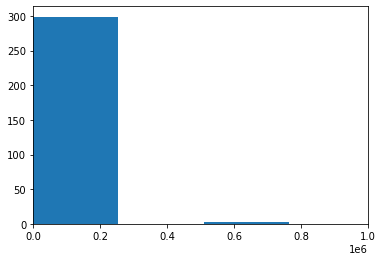

In [64]:
plt.hist(safe.DRGAM1, bins = 200)
plt.xlim(0, 1000000)

So using DRGAM1, the safe group has, on average, 10.5 million grams, vs the unsafe group who has 5217. Yet their sentence is shorter.<br>
I cannot figure out what's going out with these quantities for safe v. nonsafe defs. 

In [65]:
safe.STATMIN.describe()

count    546.000000
mean      54.901099
std       52.925509
min        0.000000
25%        0.000000
50%       60.000000
75%      120.000000
max      240.000000
Name: STATMIN, dtype: float64

In [66]:
safe.DRUGMIN.describe()

count    546.000000
mean      54.857143
std       52.961174
min        0.000000
25%        0.000000
50%       60.000000
75%      120.000000
max      240.000000
Name: DRUGMIN, dtype: float64

STATMIN and DRUGMIN should show the mandatory minimum sentences, but with such enormous quantities, I would think the minimums would be higher.

In [67]:
safe.TOTPRISN.describe()

count    546.000000
mean      32.765568
std       29.066832
min        0.000000
25%        6.000000
50%       30.000000
75%       48.000000
max      168.000000
Name: TOTPRISN, dtype: float64

Since the safety valve is only applied to drug offenders, we need to base our disparity percentages on drug crimes rather than the general sentencing population.

In [68]:
drugs = tn.loc[tn['VIOLENCE'] == 'Drug-Related']
drugs.value_counts('NEWRACE')

NEWRACE
White       1716
Black       1049
Hispanic     251
Other         51
dtype: int64

In [69]:
546/3067

0.17802412781219432

In [71]:
pleas = tn.loc[tn['DISPOSIT'] == 1]
trials = tn.loc[tn['DISPOSIT'] > 1]
plea_df = pleas.value_counts('CRIMETYPE').to_frame().reset_index()
plea_df.columns = ['crime', 'count']
plea_df['perc'] = [3122*100/7047, 1474*100/7047, 800*100/7047, 333*100/7047, 252*100/7047, 221*100/7047, 185*100/7047, 174*100/7047, 143*100/7047, 109*100/7047, 76*100/7047, 21*100/7047, 17*100/7047, 9*100/7047]
plea_df['plea'] = 'Plea'
plea_df

,crime,count,perc,plea
0,drugs,3122,44.302540,Plea
1,firearms,1474,20.916702,Plea
2,other,800,11.352349,Plea
3,immigration,444,4.725415,Plea
4,fraud,252,3.575990,Plea
5,racketeering,221,3.136086,Plea
6,conspiracy,185,2.625231,Plea
7,child abuse,174,2.469136,Plea
8,embezzlement_theft,143,2.029232,Plea
9,robbery,109,1.546757,Plea


In [72]:
trial_df = trials.value_counts('CRIMETYPE').to_frame().reset_index()
trial_df.columns = ['crime', 'count']
trial_df['perc'] = [57*100/211, 55*100/211, 25*100/211, 24*100/211, 17*100/211, 11*100/211, 6*100/211, 5*100/211, 3*100/211, 2*100/211, 2*100/211, 2*100/211, 1*100/211, 1*100/211]
trial_df['plea'] = 'Trial'
trial_df

,crime,count,perc,plea
0,firearms,57,27.014218,Trial
1,drugs,55,26.066351,Trial
2,fraud,25,11.848341,Trial
3,other,24,11.374408,Trial
4,racketeering,17,8.056872,Trial
5,conspiracy,11,5.213270,Trial
6,human trafficking,6,2.843602,Trial
7,child abuse,5,2.369668,Trial
8,robbery,3,1.421801,Trial
9,sexual,2,0.947867,Trial


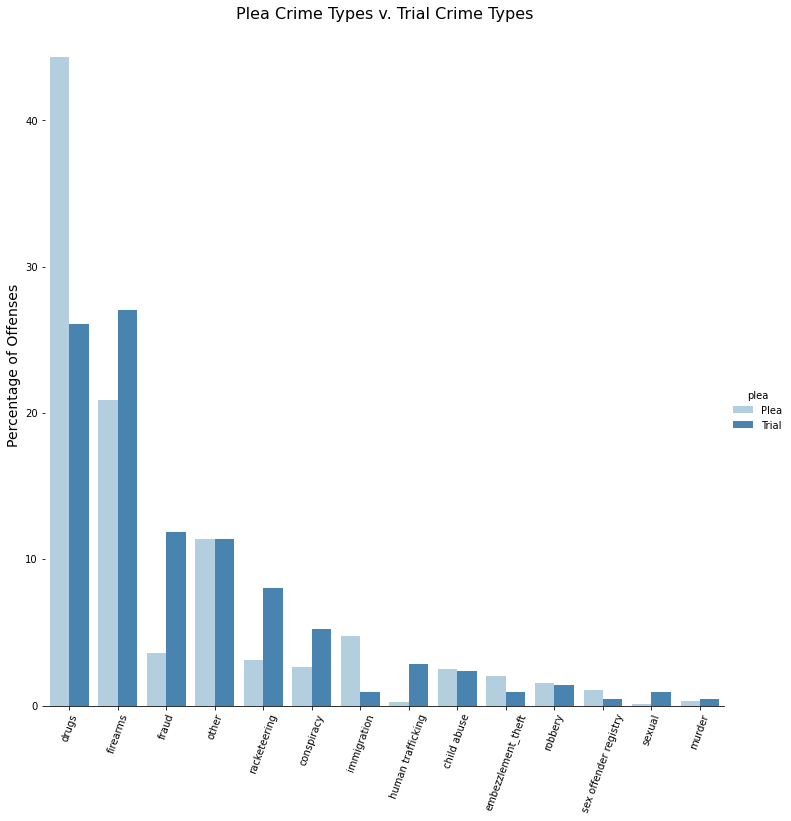

In [73]:
pleatrials = pd.concat([plea_df, trial_df])
pleatrials = pleatrials.sort_values('perc', ascending = False)
g = sns.catplot(
    data=pleatrials, kind="bar",
    x="crime", y="perc", hue="plea",
    ci="sd", palette=("Blues"), height=10
)
g.despine(left=True)
g.set_axis_labels("", "Percentage of Offenses", fontsize = 14)
plt.title("Plea Crime Types v. Trial Crime Types", fontsize = 16)
plt.xticks(rotation = 70)
# plt.xticks([4, 5, 6, 7], ['1st Quartile', '2nd Quartile', '3rd Quartile', 'Max'])
# plt.ylim(0, 60)
# plt.xlim(3.5, 7.5)
# plt.hlines(y=6.8, xmin = 3.5, xmax = 7.5, color = 'red')
# plt.annotate(text = 'Average with Criminal History', xy = (3.75, 7.3))
# plt.hlines(y=4.25, xmin = 3.5, xmax = 7.5, color = 'red')
# plt.annotate(text = 'Average without Criminal History', xy = (3.75, 4.75))

g.savefig('../Visualizations/Plea v Trial Crime Types.png', dpi = 75)

(array([1., 1., 0., 1., 0., 0., 1., 0., 1., 1.]),
 array([12.58333333, 14.625     , 16.66666667, 18.70833333, 20.75      ,
        22.79166667, 24.83333333, 26.875     , 28.91666667, 30.95833333,
        33.        ]),
 <BarContainer object of 10 artists>)

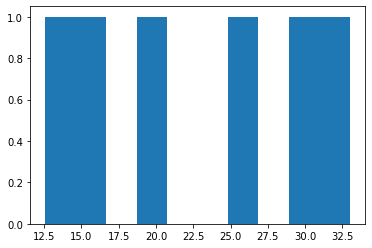

In [74]:
sex = trials.loc[trials['CRIMETYPE'] == 'human trafficking']
plt.hist(sex.TOTPRISN_YRS)

In [75]:
cols = ['CRIMETYPE']
sums = {'TOTPRISN_YRS': 'mean', 'USSCIDN': 'count'}
trial_groups = trials.groupby(by = cols).agg(sums).reset_index()
trial_groups.columns = ['CRIMETYPE', 'Avg_Sentence', 'Count']
trial_groups = trial_groups.sort_values('Count', ascending = False)
trial_groups['plea'] = 'Trial'
trial_groups

,CRIMETYPE,Avg_Sentence,Count,plea
4,firearms,24.345029,57,Trial
2,drugs,126.207576,55,Trial
5,fraud,6.570000,25,Trial
9,other,8.180556,24,Trial
10,racketeering,126.000000,17,Trial
1,conspiracy,8.090909,11,Trial
6,human trafficking,22.527778,6,Trial
0,child abuse,176.200000,5,Trial
11,robbery,49.500000,3,Trial
3,embezzlement_theft,0.500000,2,Trial


In [76]:
cols = ['CRIMETYPE']
sums = {'TOTPRISN_YRS': 'mean', 'USSCIDN': 'count'}
plea_groups = pleas.groupby(by = cols).agg(sums).reset_index()
plea_groups.columns = ['CRIMETYPE', 'Avg_Sentence', 'Count']
plea_groups = plea_groups.sort_values('Count', ascending = False)
plea_groups['plea'] = 'Plea'
plea_groups

,CRIMETYPE,Avg_Sentence,Count,plea
2,drugs,7.639814,3122,Plea
4,firearms,4.974616,1474,Plea
9,other,2.083958,800,Plea
7,immigration,0.814377,444,Plea
5,fraud,2.165344,252,Plea
10,racketeering,11.519985,221,Plea
1,conspiracy,1.441892,185,Plea
0,child abuse,14.170019,174,Plea
3,embezzlement_theft,0.659674,143,Plea
11,robbery,7.229358,109,Plea


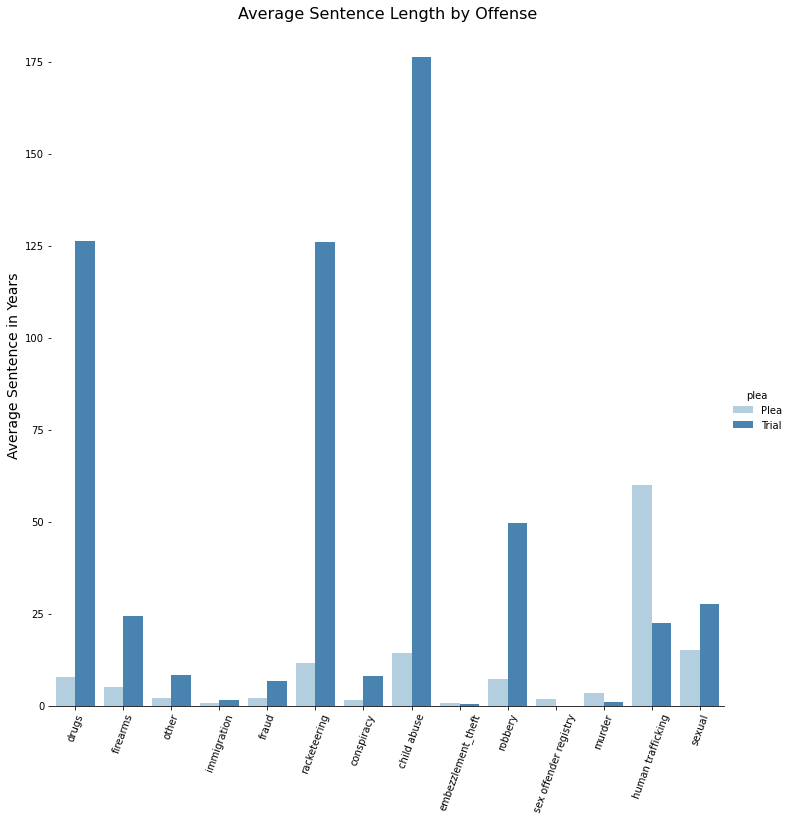

In [77]:
plea_trials = pd.concat([plea_groups, trial_groups])
# plea_trials = plea_trials.sort_values('perc', ascending = False)
g = sns.catplot(
    data=plea_trials, kind="bar",
    x="CRIMETYPE", y="Avg_Sentence", hue="plea",
    ci="sd", palette=("Blues"), height=10
)
g.despine(left=True)
g.set_axis_labels("", "Average Sentence in Years", fontsize = 14)
plt.title("Average Sentence Length by Offense", fontsize = 16)
plt.xticks(rotation = 70)

g.savefig('../Visualizations/Plea v Trial Sentence Lengths.png', dpi = 75)

In [79]:
plea_trials

,CRIMETYPE,Avg_Sentence,Count,plea
2,drugs,7.639814,3122,Plea
4,firearms,4.974616,1474,Plea
9,other,2.083958,800,Plea
7,immigration,0.814377,444,Plea
5,fraud,2.165344,252,Plea
10,racketeering,11.519985,221,Plea
1,conspiracy,1.441892,185,Plea
0,child abuse,14.170019,174,Plea
3,embezzlement_theft,0.659674,143,Plea
11,robbery,7.229358,109,Plea


In [105]:
bigdf = pd.merge(plea_groups, trial_groups, on = 'CRIMETYPE', how = 'inner')
bigdf.columns = ['crime', 'avg_plea_sentence', 'plea_count', 'plea', 'avg_trial_sentence', 'trial_count', 'trial']
bigdf = bigdf.drop(columns = ['plea', 'trial'])
bigdf['differential'] = bigdf.avg_trial_sentence - bigdf.avg_plea_sentence
bigdf = bigdf.sort_values('differential', ascending = False)
bigdf

,crime,avg_plea_sentence,plea_count,avg_trial_sentence,trial_count,differential
7,child abuse,14.170019,174,176.200000,5,162.029981
0,drugs,7.639814,3122,126.207576,55,118.567762
5,racketeering,11.519985,221,126.000000,17,114.480015
9,robbery,7.229358,109,49.500000,3,42.270642
1,firearms,4.974616,1474,24.345029,57,19.370414
13,sexual,15.000000,9,27.500000,2,12.500000
6,conspiracy,1.441892,185,8.090909,11,6.649017
2,other,2.083958,800,8.180556,24,6.096597
4,fraud,2.165344,252,6.570000,25,4.404656
3,immigration,0.814377,444,1.375000,2,0.560623


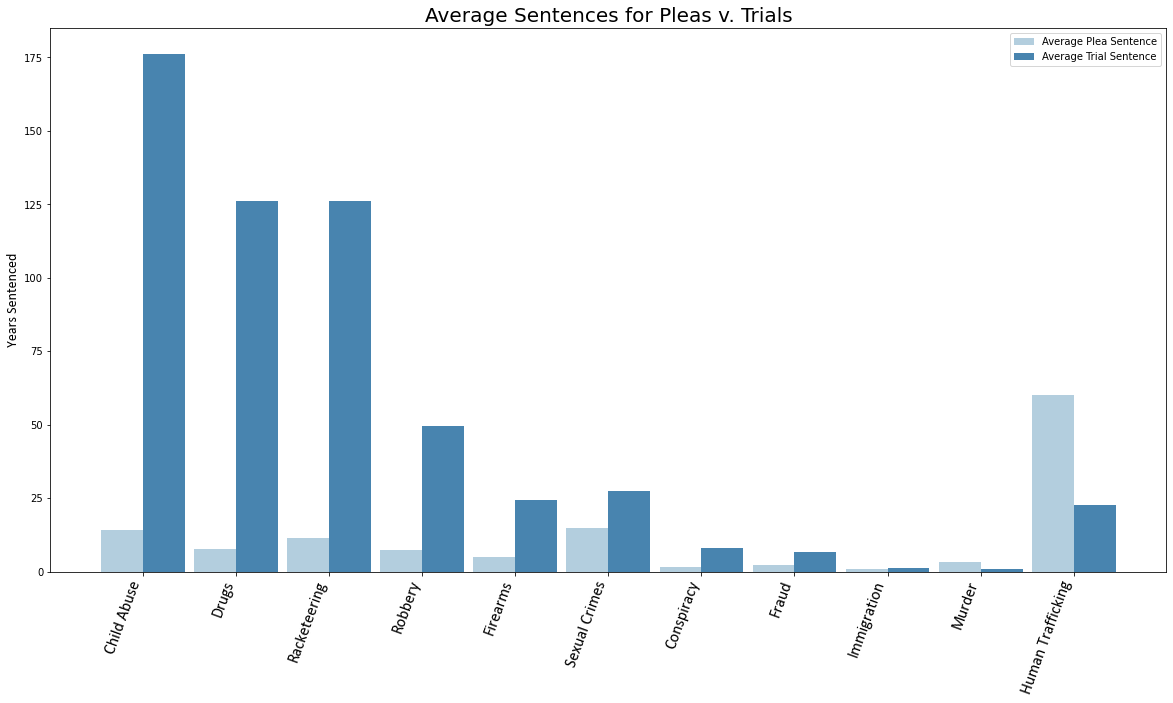

In [104]:
bigdf_plt = bigdf.loc[bigdf['crime'] != 'sex offender registry']
bigdf_plt = bigdf_plt.loc[bigdf_plt['crime'] != 'embezzlement_theft']
bigdf_plt = bigdf_plt.loc[bigdf_plt['crime'] != 'other']
cfont = {'fontname':'Calibri'}
labels = ['Child Abuse', 'Drugs', 'Racketeering', 'Robbery', 'Firearms', 'Sexual Crimes', 'Conspiracy', 
          'Fraud', 'Immigration', 'Murder', 'Human Trafficking']
y1 = list(bigdf_plt['avg_plea_sentence'])
y2 = list(bigdf_plt['avg_trial_sentence'])
x = np.arange(len(labels))
width = .45

fig, ax = plt.subplots(figsize = (20, 10))
plea_sense = ax.bar(x - width/2, y1, width, label =  'Average Plea Sentence', color = ['#B3CEDE', ])
trial_sense = ax.bar(x + width/2, y2, width, label = 'Average Trial Sentence', color = '#4884AF')
ax.set_title('Average Sentences for Pleas v. Trials', fontsize = 20)
ax.set_ylabel('Years Sentenced', fontdict = {'fontsize': 14, 'fontname': 'Calibri'})
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict = {'fontsize': 16, 'fontname': 'Calibri'})
plt.xticks(rotation = 70, horizontalalignment = 'right')
ax.legend()

plt.savefig('../Visualizations/Average Sentences for Pleas v Trials.png', dpi = 75)

In [108]:
bigdf_plt['plea_perc'] = bigdf_plt.plea_count * 100 / (bigdf_plt.plea_count + bigdf_plt.trial_count)
bigdf_plt['trial_perc'] = bigdf_plt.trial_count * 100 / (bigdf_plt.plea_count + bigdf_plt.trial_count)
bigdf_plt

,crime,avg_plea_sentence,plea_count,avg_trial_sentence,trial_count,differential,plea_perc,trial_perc
7,child abuse,14.170019,174,176.200000,5,162.029981,97.206704,2.793296
0,drugs,7.639814,3122,126.207576,55,118.567762,98.268807,1.731193
5,racketeering,11.519985,221,126.000000,17,114.480015,92.857143,7.142857
9,robbery,7.229358,109,49.500000,3,42.270642,97.321429,2.678571
1,firearms,4.974616,1474,24.345029,57,19.370414,96.276943,3.723057
13,sexual,15.000000,9,27.500000,2,12.500000,81.818182,18.181818
6,conspiracy,1.441892,185,8.090909,11,6.649017,94.387755,5.612245
4,fraud,2.165344,252,6.570000,25,4.404656,90.974729,9.025271
3,immigration,0.814377,444,1.375000,2,0.560623,99.551570,0.448430
11,murder,3.361111,21,0.833333,1,-2.527778,95.454545,4.545455


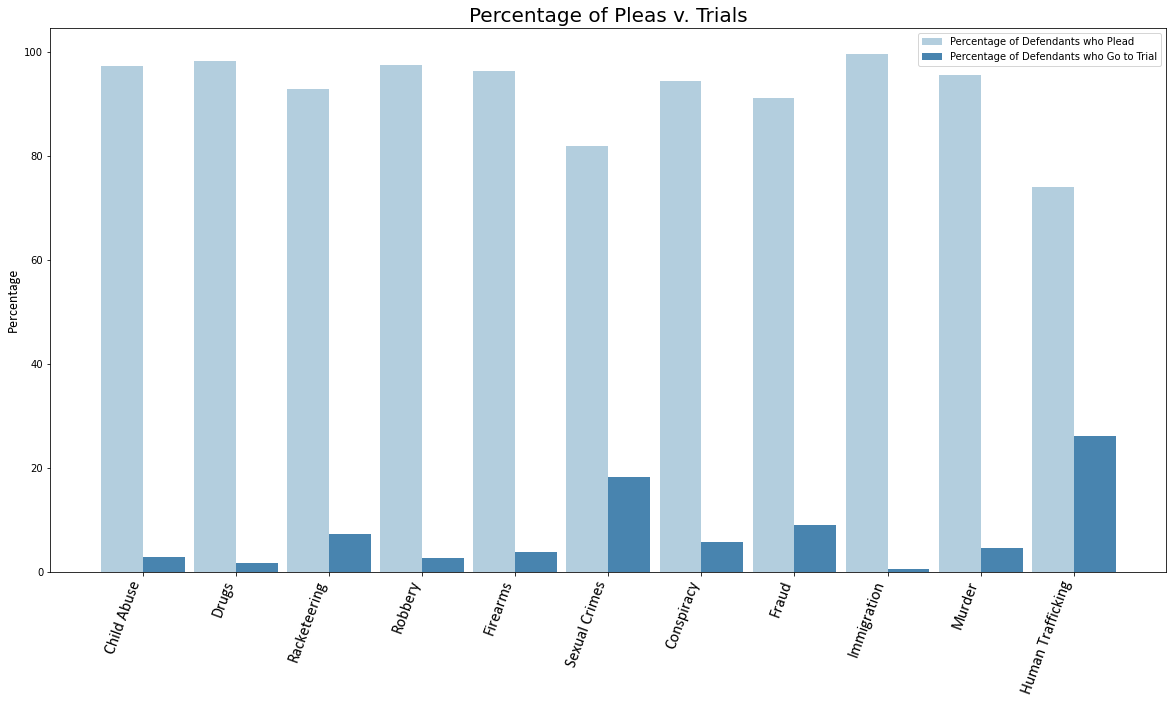

In [110]:
cfont = {'fontname':'Calibri'}
labels = ['Child Abuse', 'Drugs', 'Racketeering', 'Robbery', 'Firearms', 'Sexual Crimes', 'Conspiracy', 
          'Fraud', 'Immigration', 'Murder', 'Human Trafficking']
y1 = list(bigdf_plt['plea_perc'])
y2 = list(bigdf_plt['trial_perc'])
x = np.arange(len(labels))
width = .45

fig, ax = plt.subplots(figsize = (20, 10))
plea_sense = ax.bar(x - width/2, y1, width, label =  'Percentage of Defendants who Plead', color = ['#B3CEDE', ])
trial_sense = ax.bar(x + width/2, y2, width, label = 'Percentage of Defendants who Go to Trial', color = '#4884AF')
ax.set_title('Percentage of Pleas v. Trials', fontsize = 20)
ax.set_ylabel('Percentage', fontdict = {'fontsize': 14, 'fontname': 'Calibri'})
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict = {'fontsize': 16, 'fontname': 'Calibri'})
plt.xticks(rotation = 70, horizontalalignment = 'right')
ax.legend()

plt.savefig('../Visualizations/Count Pleas v Trials by Crime Type.png', dpi = 75)